(784,) 1 <class 'numpy.ndarray'>


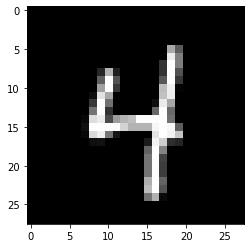

In [ ]:
# MANUPILATING TENSOR DATA in NumPy
from keras.datasets import mnist
import numpy as np
(train_images, train_label), (test_images, test_label)=mnist.load_data()

'''#Slicing the image data to take the interested area as we take 90 images below
my_slice=train_images[10:100]
print(my_slice.shape)

#Also we can take part of the inner matrix
my_slice=train_images[10:100, 0:24, 0:24]
print(my_slice.shape)
#we can also determine the boundary from the last and first elements in the demanded range
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)'''

# we load our image data now we should re arrange input for process
# these inputs store as numpy array in type float32
train_images.shape
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

example_image = test_images[19]
print(example_image.shape, example_image.ndim, type(example_image))

# Already in numpy array format with dtype = 'float32', 
# if were not
# example_image = np.array(example_image, dtype='float32')

# We need to reshape as it include 2 layer (3rd is gray)
example_image = example_image.reshape((28,28))

from matplotlib import pyplot as plt
plt.imshow(example_image, cmap='gray')

In [ ]:
#now we can indicate our model
import tensorflow as tf
from tensorflow import keras
from keras import layers
model = keras.Sequential([
                           layers.Dense(512, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

#now we can arrange optimization and loss function
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

#finally training loops
model.fit(train_images, train_label, batch_size=256, epochs=5)

Epoch 1/5
235/235 [==============================] - 3s 10ms/step - loss: 0.3160 - accuracy: 0.9093
Epoch 2/5
235/235 [==============================] - 2s 10ms/step - loss: 0.1308 - accuracy: 0.9624
Epoch 3/5
235/235 [==============================] - 2s 10ms/step - loss: 0.0865 - accuracy: 0.9747
Epoch 4/5
235/235 [==============================] - 2s 10ms/step - loss: 0.0624 - accuracy: 0.9818
Epoch 5/5
235/235 [==============================] - 2s 10ms/step - loss: 0.0477 - accuracy: 0.9859
